In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv', index_col='Id')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Funções

In [4]:
# Distância euclidiana
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

In [5]:
# k vizinhos mais proximos
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

In [15]:
# Classificação de novo k
def predict_classification(X, y, test_row, k):
    print(test_row)
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
#     print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

# Analises

## Separação de treino e teste

In [11]:
df_train = df.sample(frac=0.7, random_state=42)
df_test = df[~df.index.isin(df_train.index)]

In [31]:
X_train, y_train = df_train.drop(columns=['Species'], axis=1).values, df_train['Species'].values
X_test, y_test = df_test.drop(columns=['Species'], axis=1).values, df_test['Species'].values

## k=3

In [67]:
y_pred_3 = [predict_classification(X_train, y_train, np.array(x), k=3) for x in X_test]

In [68]:
accuracy = sum(y_pred_3 == y_test)/len(y_test) * 100
print('Accuracy de k=3 é {}%'.format(accuracy))

Accuracy de k=3 é 97.77777777777777%


### k=5

In [86]:
y_pred_5 = [predict_classification(X_train, y_train, np.array(x), k=5) for x in X_test]

In [87]:
accuracy = sum(y_pred_5 == y_test)/len(y_test) * 100
print('Accuracy de k=5 é {}%'.format(accuracy))

Accuracy de k=5 é 97.77777777777777%


## Visualização de k

In [79]:
import matplotlib.pyplot as plt

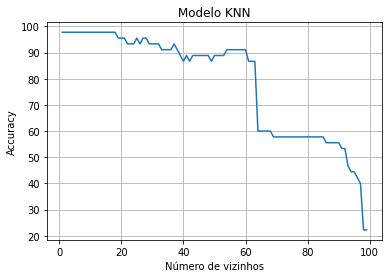

In [85]:
neighbors = np.arange(1, 100)

acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    y_pred = [predict_classification(X_train, y_train, np.array(x), k=k) for x in X_test]
    accuracy = sum(y_pred == y_test)/len(y_test) * 100
    acc[i] = accuracy

plt.title('Modelo KNN')
plt.plot(neighbors, acc)
plt.grid()
plt.xlabel('Número de vizinhos')
plt.ylabel('Accuracy')
plt.show()